In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
df=pd.read_csv("FoDS-A1.csv")
df

Strength  Temperature  Pressure
0         30.7          240        16
1         24.7          250        18
2         30.6          260        16
3         32.8          240        10
4         20.7          240        20
...        ...          ...       ...
1645      32.5          270        20
1646      38.6          290        14
1647      39.7          290        12
1648      14.6          200        20
1649      19.8          210        20

[1650 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strength     1650 non-null   float64
 1   Temperature  1650 non-null   int64  
 2   Pressure     1650 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 38.8 KB


In [4]:
df.isnull()

Strength  Temperature  Pressure
0        False        False     False
1        False        False     False
2        False        False     False
3        False        False     False
4        False        False     False
...        ...          ...       ...
1645     False        False     False
1646     False        False     False
1647     False        False     False
1648     False        False     False
1649     False        False     False

[1650 rows x 3 columns]

In [5]:
df=df.sample(frac=1)
df

Strength  Temperature  Pressure
349       34.2          270        16
430       32.6          260        14
1529      22.5          200        14
586       37.8          260        12
1351      23.0          220        18
...        ...          ...       ...
1457      34.2          290        18
573       25.7          240        16
516       29.7          250        14
1066      31.7          260        14
647       17.2          220        20

[1650 rows x 3 columns]

In [6]:
def standardize(df):
    df_new=df.copy()
    for c in df_new.columns:
        df_new[c]=(df_new[c]-df_new[c].mean())/df_new[c].std()
    return df_new

In [7]:
df_standardized=standardize(df)
df_standardized

Strength  Temperature  Pressure
349   0.568317     0.632264  0.292681
430   0.351815     0.316132 -0.292681
1529 -1.014851    -1.580660 -0.292681
586   1.055445     0.316132 -0.878044
1351 -0.947194    -0.948396  0.878044
...        ...          ...       ...
1457  0.568317     1.264528  0.878044
573  -0.581848    -0.316132  0.292681
516  -0.040594     0.000000 -0.292681
1066  0.230033     0.316132 -0.292681
647  -1.732012    -0.948396  1.463406

[1650 rows x 3 columns]

In [8]:
df_train=df_standardized.sample(frac=0.7)
df_test=df_standardized.drop(df_train.index)
df_train


Strength  Temperature  Pressure
480   0.054125     0.632264  0.292681
603   0.893069     0.632264 -0.878044
569  -0.108251     0.632264  0.878044
954   1.962045     1.264528 -0.878044
1511  1.921451     1.580660 -1.463406
...        ...          ...       ...
1134 -0.703630    -0.316132  0.878044
1601 -0.784818    -1.264528 -0.878044
1481  0.311221     1.264528  1.463406
693   0.676567     0.316132 -0.292681
1569 -0.784818     0.000000  1.463406

[1155 rows x 3 columns]

In [9]:
df_test

Strength  Temperature  Pressure
430   0.351815     0.316132 -0.292681
586   1.055445     0.316132 -0.878044
1351 -0.947194    -0.948396  0.878044
1559  1.420791     0.316132 -1.463406
413   0.703630     1.264528  0.292681
...        ...          ...       ...
821   1.285478     0.948396 -1.463406
1525 -1.190758    -0.948396  0.292681
1359 -1.867326    -1.264528  1.463406
1159 -0.771287     0.000000  1.463406
573  -0.581848    -0.316132  0.292681

[495 rows x 3 columns]

In [10]:
y_train=df_train['Pressure'].to_numpy()
y_test=df_test['Pressure'].to_numpy()
x1_train=df_train['Strength'].to_numpy()
x1_test=df_test['Strength'].to_numpy()
x2_train=df_train['Temperature'].to_numpy()
x2_test=df_test['Temperature'].to_numpy()
x1_train=x1_train.reshape((x1_train.size,1))
y_train=y_train.reshape((y_train.size,1))
x2_train=x2_train.reshape((x2_train.size,1))
x1_test=x1_test.reshape((x1_test.size,1))
y_test=y_test.reshape((y_test.size,1))
x2_test=x2_test.reshape((x2_test.size,1))


In [11]:
def make_matrices(x1,x2,y):
    x1_2=x1**2
    x2_2=x2**2
    x1_3=x1**3
    x2_3=x2**3
    x1_4=x1**4
    x2_4=x2**4
    x1_5=x1**5
    x2_5=x2**5
    x1_6=x1**6
    x2_6=x2**6
    x1_7=x1**7
    x2_7=x2**7
    x1_8=x1**8
    x2_8=x2**8
    x1_9=x1**9
    x2_9=x2**9
    n = y.shape[0]
    ones=np.ones((n,1),dtype='float64');
    X=np.hstack((ones,x1,x2,x1_2,x2_2,x1*x2,x1_3,x2_3,x1_2*x2,x2_2*x1,x1_4,x2_4,x1_3*x2,x2_3*x1,x1_2*x2_2,x1_5,x2_5,x1_4*x2,x2_4*x1,x1_3*x2_2,x2_3*x1_2,x1_6,x2_6,x1_5*x2,x2_5*x1,x1_4*x2_2,x2_4*x1_2,x1_3*x2_3,x1_7,x2_7,x1_6*x2,x2_6*x1,x1_5*x2_2,x2_5*x1_2,x1_4*x2_3,x2_4*x1_3,x1_8,x2_8,x1_7*x2,x2_7*x1,x1_6*x2_2,x2_6*x1_2,x1_5*x2_3,x2_5*x1_3,x1_4*x2_4,x1_9,x2_9,x1_8*x2,x2_8*x1,x1_7*x2_2,x2_7*x1_2,x1_6*x2_3,x2_6*x1_3,x1_5*x2_4,x2_5*x1_4))
    W=np.zeros((X.shape[1],1),dtype='float64')
    return X,W

In [12]:
X,W=make_matrices(x1_train,x2_train,y_train)
X=X.astype('float64')
X.shape

(1155, 55)

In [13]:
Xt,a=make_matrices(x1_test,x2_test,y_test)
Xt=Xt.astype('float64')
Xt.shape

(495, 55)

In [20]:
def error(theta,x,y,lam,r):
    if r=='r': M=theta**2 #ridge
    elif r=='l': M=np.abs(theta) #lasso
    else: M=0*theta #gradient descent
        
    E=1/2 *(np.sum((x@theta-y)**2)+lam*np.sum(M))/y.shape[0]
    return E

In [38]:
def Grad(theta,x,y,learning_rate,ite,lam,r):
    J=np.zeros((int(ite/50),1))
    m=y.shape[0]
    k=0
    for i in range(ite):
        if r=='l': M=np.sign(theta) #lasso
        elif r=='r': M=theta #ridge
        else: M=0*theta #no regularalization
        if(i%50==0): 
            J[k]=error(theta,x,y,lam,r)
            k+=1
        theta=theta-1/m*(learning_rate*(x.T@(x@theta - y))+lam*M)
    return error(theta,x,y,lam,r),theta,theta.reshape((theta.shape[0],)),J

In [67]:
def SGD(theta,x,y,learning_rate,ite,lam,r):
    J=np.zeros((int(ite/50),1))
    n=x.shape[0]
    k=0
    for i in range(ite):
        for j in range(n):
            if r=='l': M=np.sign(theta)
            elif r=='r': M=theta
            else: M=0*theta
            index=np.random.randint(n)
            x_pnt=x[index:index+1,:]
            y_pnt=y[index:index+1,:]
            theta=theta-(learning_rate*(x_pnt.T@(x_pnt@theta-y_pnt))+lam*M)/n
        if(i%50==0): 
            
            J[k]=error(theta,x,y,lam,r)
            k+=1
    return error(theta,x,y,lam,r),theta,theta.reshape((theta.shape[0],)),J

# GD for degrees 0-9

In [40]:
Xt,w1=make_matrices(x1_test,x2_test,y_test)
trainError=np.ones((10))
testError=np.ones((10))
ite=100000
learningRate=[0.01,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.00001,0.00001]
lam=0
error50=dict()
wg = np.zeros((55,10))
for i in range(10):
    n = int((i+1)*(i+2)/2)
    trainError[i],w,wg[0:n,i],j=Grad(W[0:n,:],X[:,0:n],y_train,learningRate[i],ite,lam,None)
    error50['degree '+str(i)]=j.reshape((j.shape[0],))
    testError[i]=error(w[0:n,:],Xt[:,0:n],y_test,lam,None)
data={'degree':[0,1,2,3,4,5,6,7,8,9],
     'Training error':trainError,
     'Testing error':testError}
print(pd.DataFrame(error50))
ans=pd.DataFrame(data)

      degree 0  degree 1  degree 2  degree 3  degree 4  degree 5  degree 6  \
0     0.484270  0.484270  0.484270  0.484270  0.484270  0.484270  0.484270   
1     0.483910  0.483249  0.483213  0.473363  0.473151  0.419407  0.419509   
2     0.483778  0.482238  0.482168  0.463787  0.463521  0.405548  0.405217   
3     0.483730  0.481237  0.481136  0.455338  0.455092  0.397972  0.397346   
4     0.483713  0.480246  0.480116  0.447844  0.447647  0.391972  0.391134   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.483702  0.121316  0.121234  0.138352  0.138206  0.131927  0.131532   
1996  0.483702  0.121286  0.121204  0.138326  0.138181  0.131908  0.131514   
1997  0.483702  0.121256  0.121173  0.138301  0.138155  0.131889  0.131495   
1998  0.483702  0.121225  0.121143  0.138275  0.138130  0.131870  0.131476   
1999  0.483702  0.121195  0.121113  0.138250  0.138105  0.131852  0.131457   

      degree 7  degree 8  degree 9  
0     0.484270  0.484270  

In [41]:
ans

degree  Training error  Testing error
0       0        0.483702       0.538911
1       1        0.121165       0.129162
2       2        0.121082       0.129092
3       3        0.138224       0.146433
4       4        0.138080       0.146209
5       5        0.131833       0.131341
6       6        0.131439       0.131771
7       7        0.126839       0.128005
8       8        0.251361       0.256035
9       9        0.238432       0.241432

In [34]:
def pol(x1,x2,w,n):
    x1_2=x1**2
    x2_2=x2**2
    x1_3=x1**3
    x2_3=x2**3
    x1_4=x1**4
    x2_4=x2**4
    x1_5=x1**5
    x2_5=x2**5
    x1_6=x1**6
    x2_6=x2**6
    x1_7=x1**7
    x2_7=x2**7
    x1_8=x1**8
    x2_8=x2**8
    x1_9=x1**9
    x2_9=x2**9
    k = [1,x1,x2,x1_2,x2_2,x1*x2,x1_3,x2_3,x1_2*x2,x2_2*x1,x1_4,x2_4,x1_3*x2,x2_3*x1,x1_2*x2_2,x1_5,x2_5,x1_4*x2,x2_4*x1,x1_3*x2_2,x2_3*x1_2,x1_6,x2_6,x1_5*x2,x2_5*x1,x1_4*x2_2,x2_4*x1_2,x1_3*x2_3,x1_7,x2_7,x1_6*x2,x2_6*x1,x1_5*x2_2,x2_5*x1_2,x1_4*x2_3,x2_4*x1_3,x1_8,x2_8,x1_7*x2,x2_7*x1,x1_6*x2_2,x2_6*x1_2,x1_5*x2_3,x2_5*x1_3,x1_4*x2_4,x1_9,x2_9,x1_8*x2,x2_8*x1,x1_7*x2_2,x2_7*x1_2,x1_6*x2_3,x2_6*x1_3,x1_5*x2_4,x2_5*x1_4]
    return np.array(k)[0:n]@np.array(w)[0:n]


In [35]:
z=np.zeros((400,400))
xx , yy = np.meshgrid(np.arange(-2,2,0.01),np.arange(-2,2,0.01))
for i in range(400):
  for j in range(400):
    z[i,j] = pol(xx[i][j],yy[i][j],w,3)

In [36]:
def finalplot(w,degree):
    k = int((degree+1)*(degree+2)/2)
    xx , yy = np.meshgrid(np.arange(-2,2,0.01),np.arange(-2,2,0.01))
    for i in range(400):
        for j in range(400):
            z[i,j] = pol(xx[i][j],yy[i][j],w,k)
    plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx,yy,z,alpha = 0.9,cmap = cm.coolwarm)
    ax.set_xlabel('Strength', fontweight ='bold')
    ax.set_ylabel('Temperature', fontweight ='bold')
    ax.set_zlabel('Pressure', fontweight ='bold')
    plt.title('Degree:'+str(degree))
    ax.view_init(30,30)



## Surface plots for GD

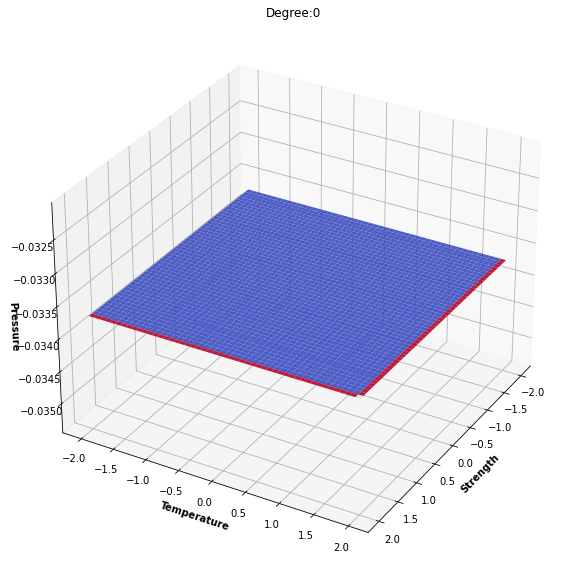

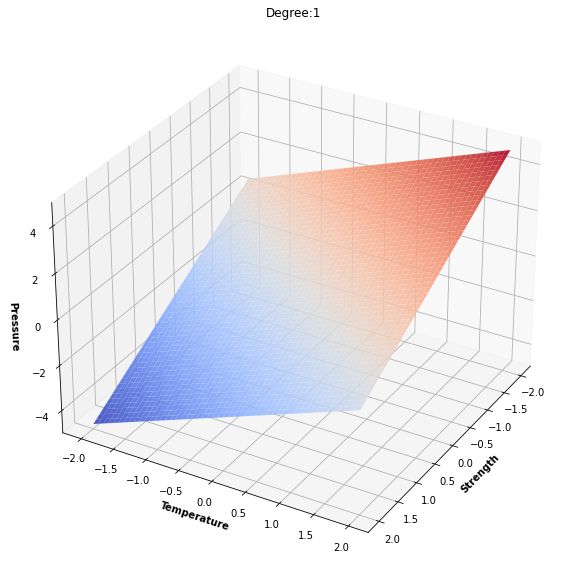

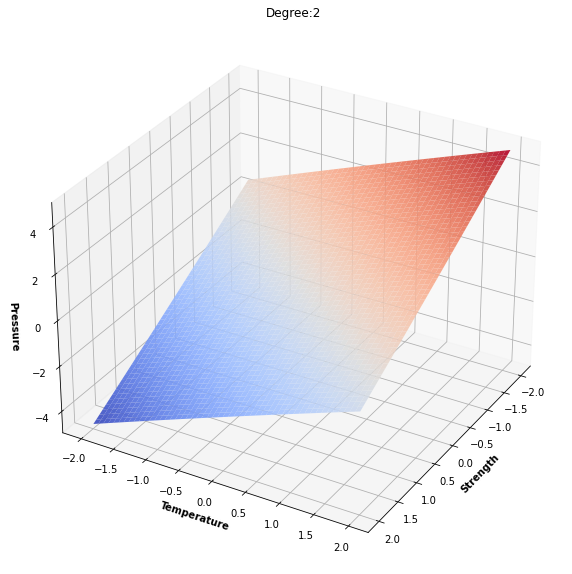

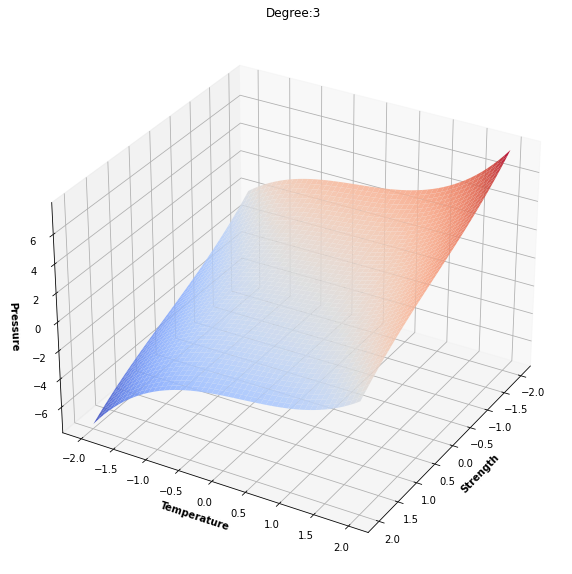

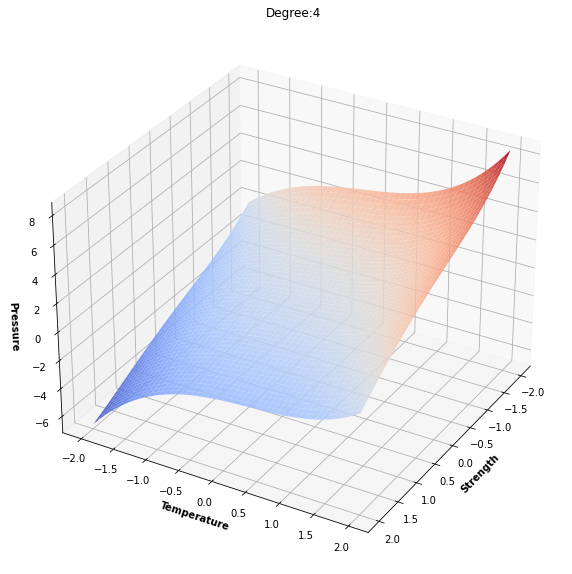

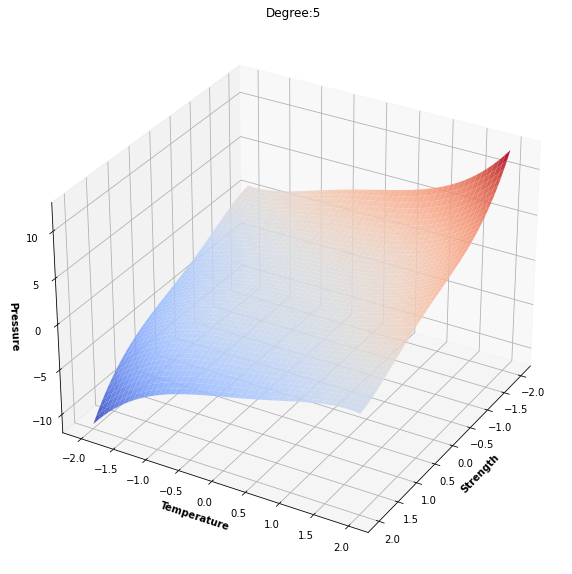

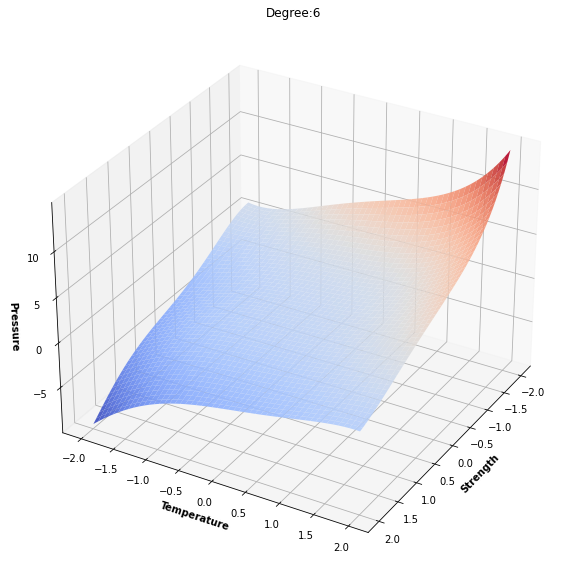

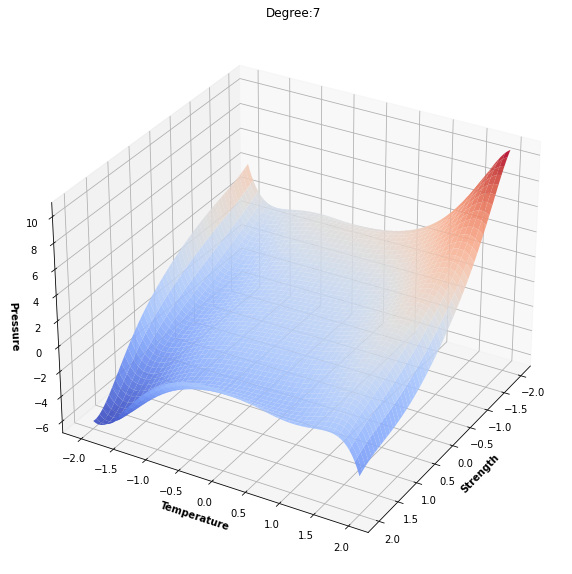

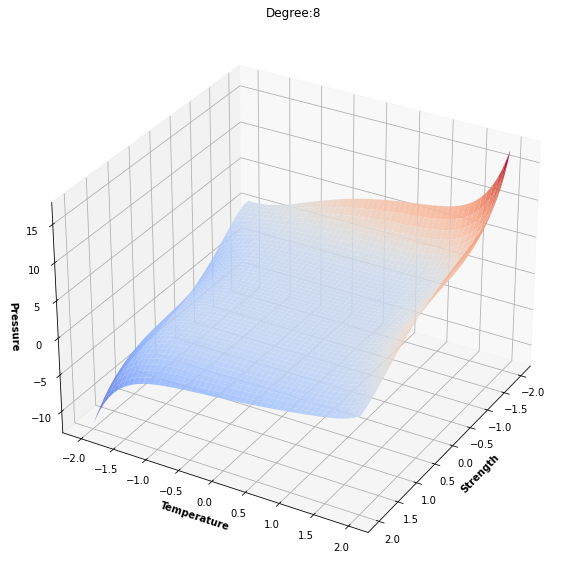

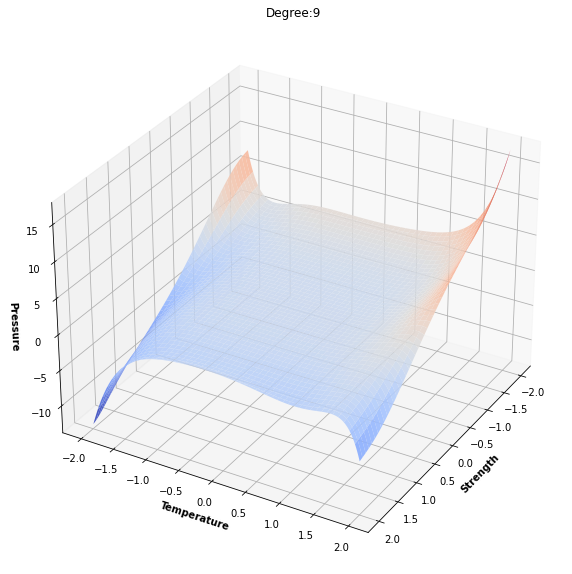

In [37]:
for i in range(10):
    n = int((i+1)*(i+2)/2)
    finalplot(wg[0:n,i],i,)

# SGD for degrees 0-9

In [68]:
Xt,w1=make_matrices(x1_test,x2_test,y_test)
trainError=np.ones((10))
testError=np.ones((10))
ite=5000
ws = np.zeros((55,10))
learningRate=[0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001]
lam=0
errors50=dict()
for i in range(10):
    n = int((i+1)*(i+2)/2)
    trainError[i],w,ws[0:n,i],js=SGD(W[0:n,:],X[:,0:n],y_train,learningRate[i],ite,lam,None)
    errors50['degree '+str(i)]=js.reshape((js.shape[0],))
    testError[i]=error(w[0:n,:],Xt[:,0:n],y_test,lam,None)
data={'degree':[0,1,2,3,4,5,6,7,8,9],
     'Training error':trainError,
     'Testing error':testError}
print(pd.DataFrame(errors50))
ansSGD=pd.DataFrame(data)

    degree 0  degree 1  degree 2  degree 3  degree 4  degree 5  degree 6  \
0   0.484253  0.484065  0.484060  0.481948  0.482129  0.460638  0.461683   
1   0.483924  0.474276  0.474141  0.415631  0.415402  0.370186  0.367453   
2   0.483778  0.465445  0.465214  0.386424  0.386136  0.352274  0.351181   
3   0.483711  0.457231  0.457044  0.366208  0.365821  0.340207  0.338812   
4   0.483715  0.449765  0.449444  0.349922  0.349476  0.329959  0.329049   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.483702  0.193331  0.193396  0.179671  0.179055  0.165993  0.165616   
96  0.483702  0.192023  0.192079  0.179078  0.178471  0.165451  0.165058   
97  0.483703  0.190734  0.190788  0.178492  0.177883  0.164893  0.164558   
98  0.483707  0.189468  0.189523  0.177914  0.177317  0.164374  0.164112   
99  0.483706  0.188211  0.188267  0.177345  0.176763  0.163822  0.163488   

    degree 7  degree 8  degree 9  
0   0.432759  0.453481  0.442317  
1   0.343000  0.4

In [69]:
ansSGD

degree  Training error  Testing error
0       0        0.483703       0.539057
1       1        0.187017       0.206029
2       2        0.187046       0.206177
3       3        0.176781       0.188625
4       4        0.176205       0.188389
5       5        0.163319       0.163212
6       6        0.162925       0.163358
7       7        0.162132       0.165036
8       8        0.276064       0.281725
9       9        0.275158       0.282046

## surface plots for SGD

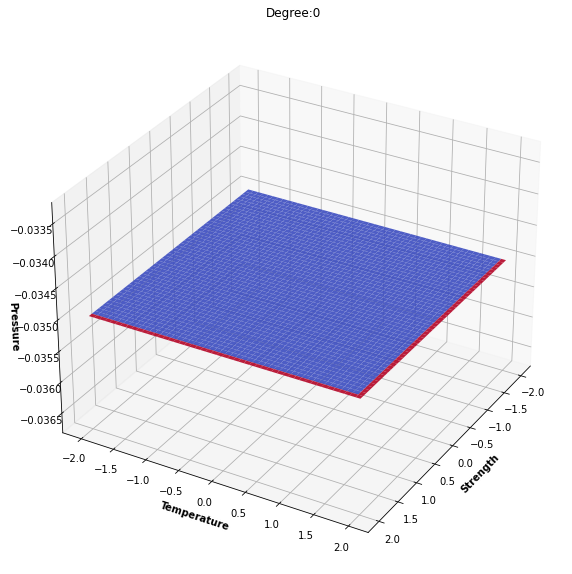

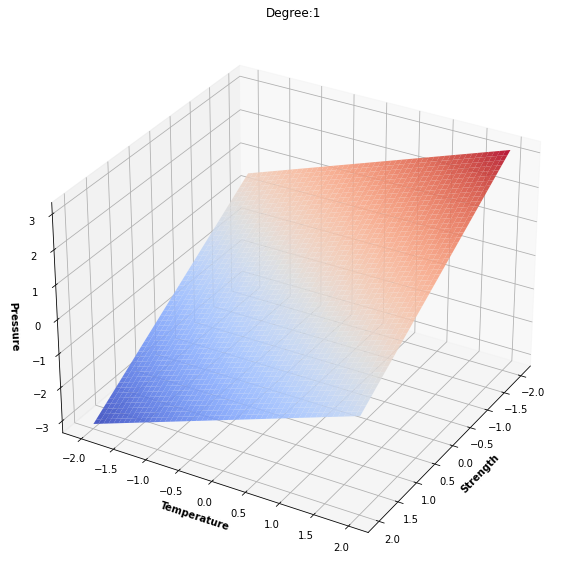

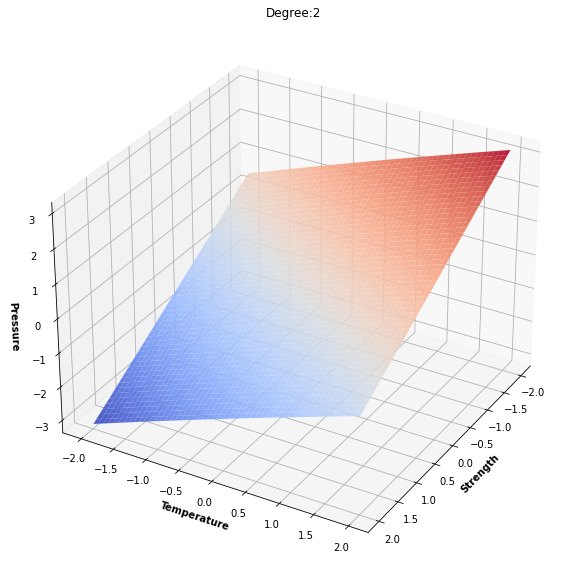

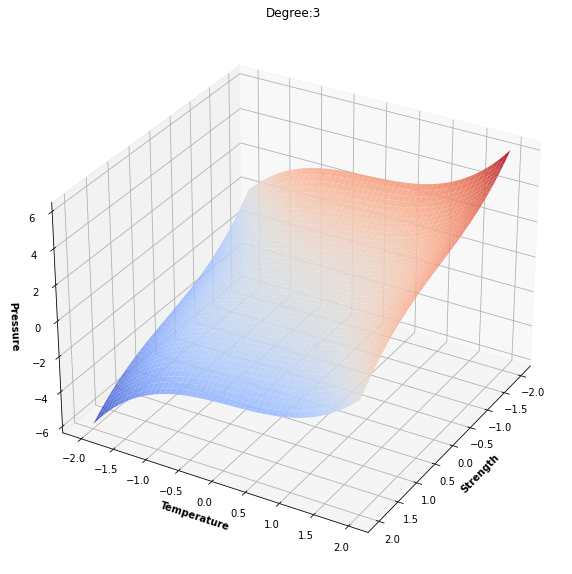

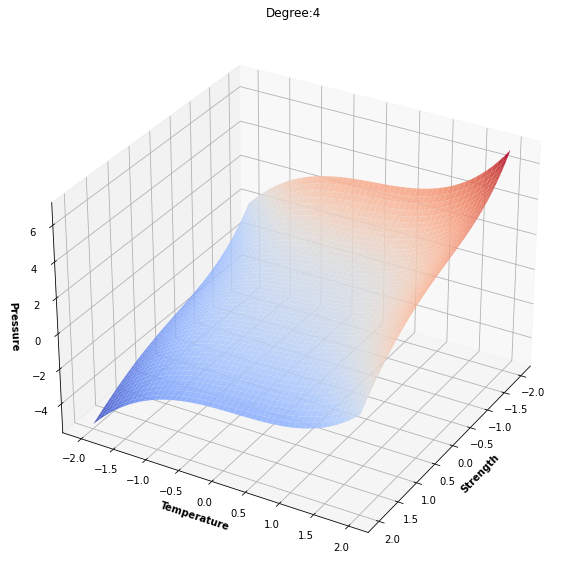

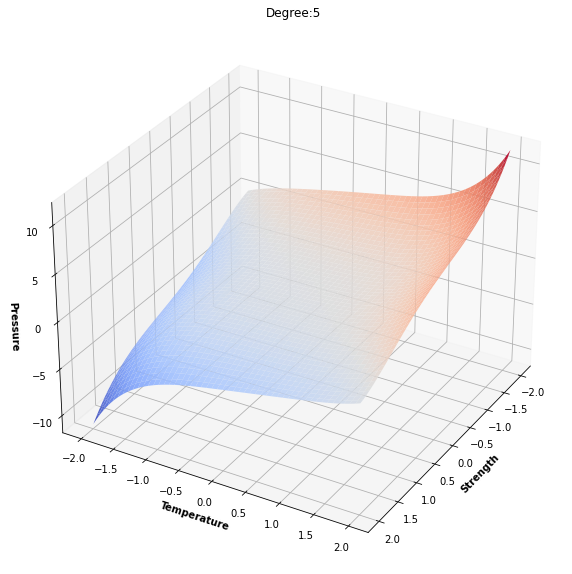

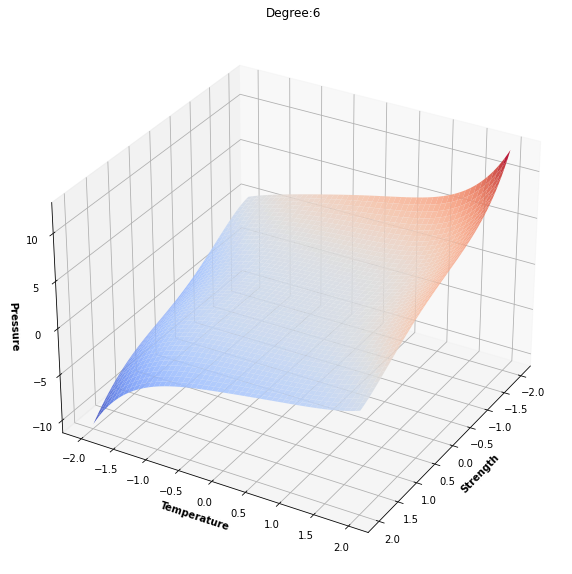

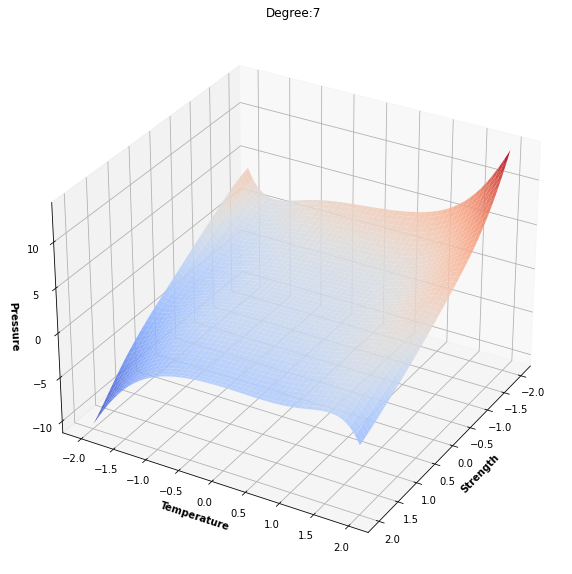

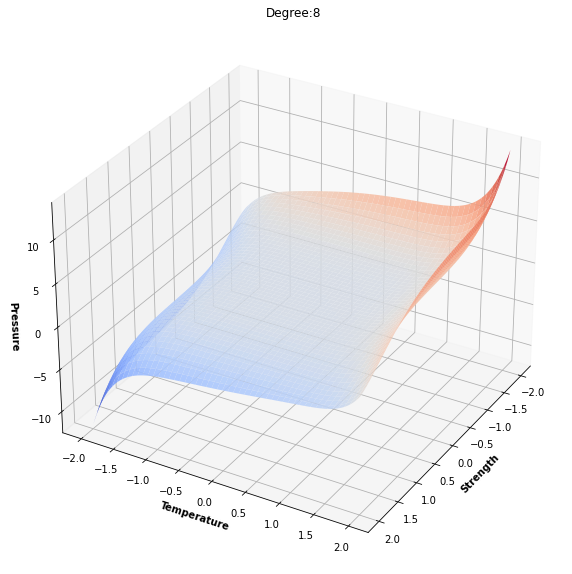

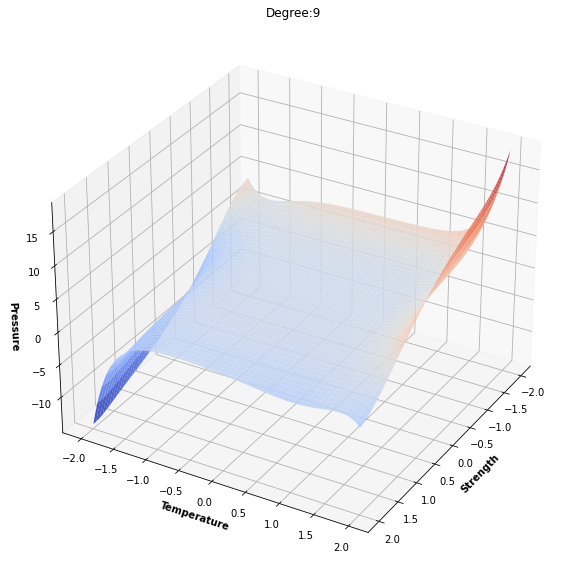

In [70]:
for i in range(10):
    n = int((i+1)*(i+2)/2)
    finalplot(ws[0:n,i],i)

# b) Regularization(Ridge and lasso regressions)

### Ridge regression

In [71]:
Xt,w1=make_matrices(x1_test,x2_test,y_test)
arrLam=np.arange(0,0.01,0.0005)
def regularization(r,g):
    if(g=='g'): ite=100000
    else: ite=5000
    
    learningRate=0.00001
    wn = np.zeros((55,20))
    numLam=20
    trainError=np.ones((numLam))
    testError=np.ones((numLam))
    for i in range(numLam):
        if(g=='g'): trainError[i],w,wn[:,i],jn=Grad(W,X,y_train,learningRate,ite,arrLam[i],r)
        else: trainError[i],w,wn[:,i],jn=SGD(W,X,y_train,learningRate,ite,arrLam[i],r)
        testError[i]=error(w,Xt,y_test,arrLam[i],r)
        table={'lambda':arrLam,
             'Training error':trainError,
             'Testing error':testError}   
        table=pd.DataFrame(table)
    return table

In [72]:
def plotReg(table):
    plt.figure(figsize=(20,10))
    x = np.arange(start = 0.,stop  = 1)
    plt.figure(1)
    plt.plot( np.log(arrLam[1:20]), np.sqrt(2*table['Training error']))
    plt.plot( np.log(arrLam[1:20]), np.sqrt(2*table['Testing error']))
    plt.xlabel("Log(lambda)")
    plt.ylabel("RMSE")

In [73]:
rtable=regularization('r','g') #ridge for gradient descent

In [86]:
rtable.tail()

lambda  Training error  Testing error
15  0.0075        0.257863       0.262984
16  0.0080        0.259000       0.264246
17  0.0085        0.260117       0.265488
18  0.0090        0.261214       0.266707
19  0.0095        0.262293       0.267906

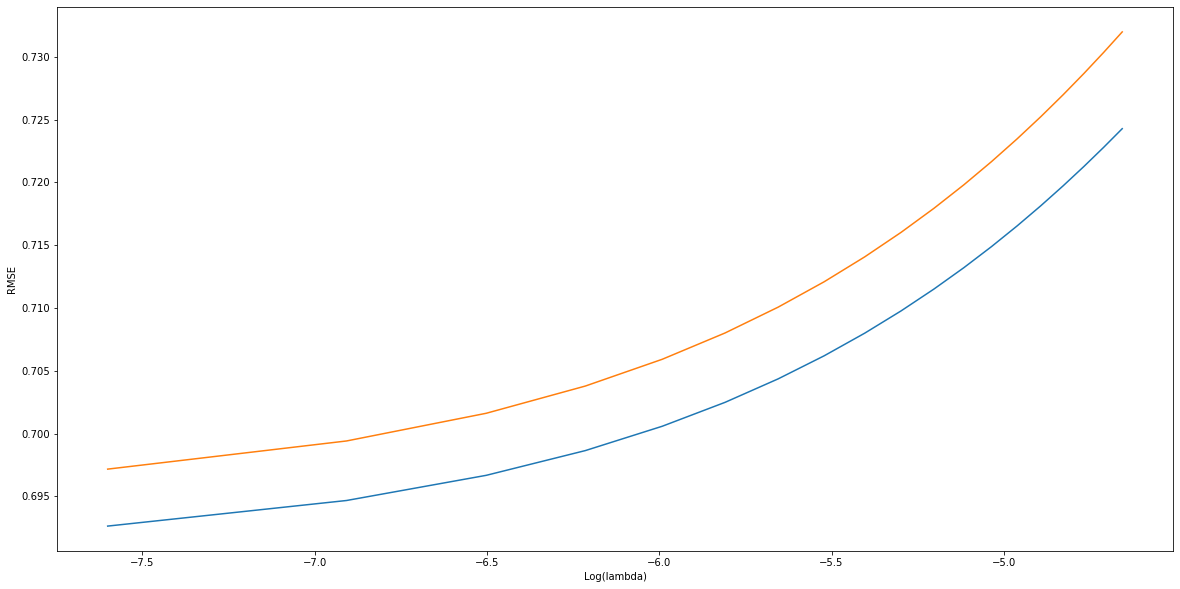

In [75]:
plotReg(rtable.drop(0))

## Lasso regression

In [76]:
ltable=regularization('l','g')

In [89]:
ltable.tail()

lambda  Training error  Testing error
15  0.0075        0.366749       0.392099
16  0.0080        0.367758       0.393337
17  0.0085        0.368813       0.394632
18  0.0090        0.369944       0.396048
19  0.0095        0.371140       0.397565

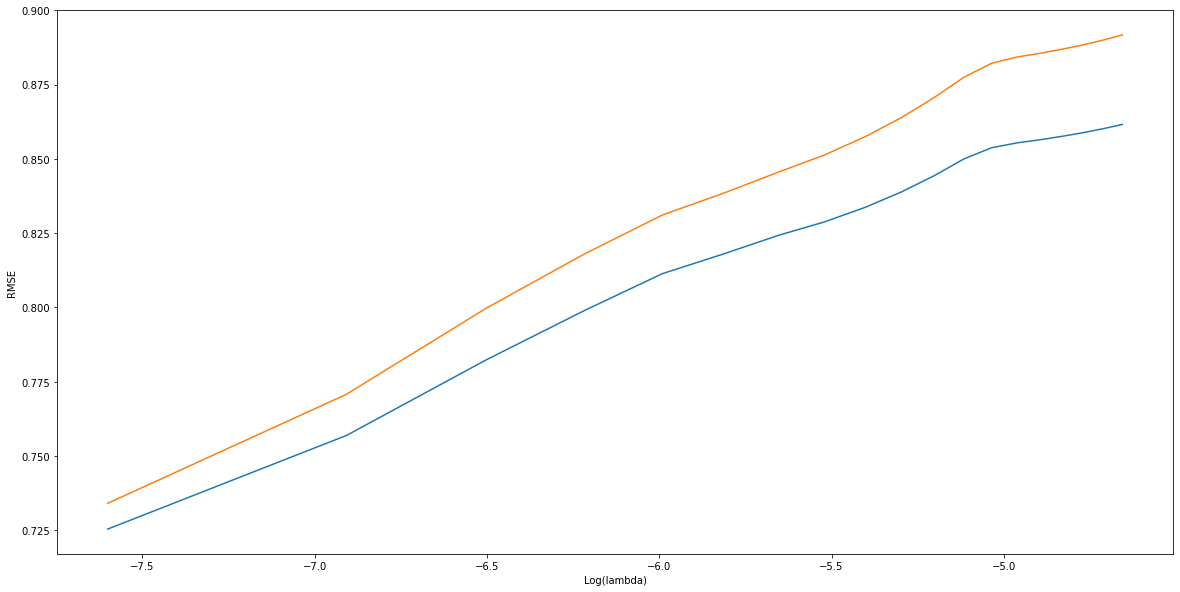

In [78]:
plotReg(ltable.drop(0))

## Using SGD

In [79]:
rstable=regularization('r','s')
rstable

lambda  Training error  Testing error
0   0.0000        0.333858       0.347522
1   0.0005        0.350612       0.370131
2   0.0010        0.363828       0.387178
3   0.0015        0.373694       0.399318
4   0.0020        0.381065       0.409170
5   0.0025        0.387102       0.416126
6   0.0030        0.391847       0.421756
7   0.0035        0.395687       0.427116
8   0.0040        0.399208       0.432041
9   0.0045        0.402150       0.435148
10  0.0050        0.404859       0.438298
11  0.0055        0.406931       0.440348
12  0.0060        0.408841       0.443056
13  0.0065        0.410965       0.447935
14  0.0070        0.412423       0.447267
15  0.0075        0.413667       0.449041
16  0.0080        0.414968       0.451384
17  0.0085        0.417337       0.451933
18  0.0090        0.417414       0.453783
19  0.0095        0.418506       0.455567

In [87]:
rstable.tail()

lambda  Training error  Testing error
15  0.0075        0.413667       0.449041
16  0.0080        0.414968       0.451384
17  0.0085        0.417337       0.451933
18  0.0090        0.417414       0.453783
19  0.0095        0.418506       0.455567

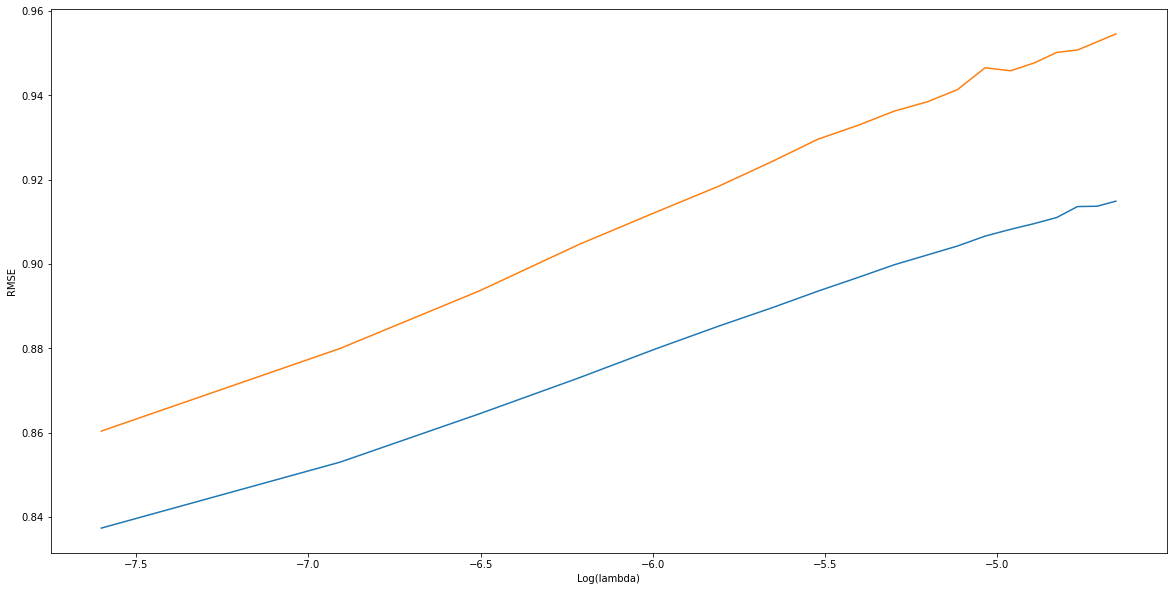

In [80]:
plotReg(rstable.drop(0))

In [81]:
lstable=regularization('l','s')
lstable

lambda  Training error  Testing error
0   0.0000        0.333885       0.347537
1   0.0005        0.479218       0.528636
2   0.0010        0.481147       0.531485
3   0.0015        0.483725       0.534938
4   0.0020        0.484286       0.535715
5   0.0025        0.484220       0.535625
6   0.0030        0.484429       0.535869
7   0.0035        0.483929       0.535234
8   0.0040        0.484143       0.535584
9   0.0045        0.484541       0.536079
10  0.0050        0.484292       0.535729
11  0.0055        0.484127       0.535500
12  0.0060        0.484717       0.536309
13  0.0065        0.482527       0.533283
14  0.0070        0.484846       0.536468
15  0.0075        0.484540       0.536088
16  0.0080        0.484407       0.535900
17  0.0085        0.484560       0.536096
18  0.0090        0.484373       0.535870
19  0.0095        0.484068       0.535440

In [88]:
lstable.tail()

lambda  Training error  Testing error
15  0.0075        0.484540       0.536088
16  0.0080        0.484407       0.535900
17  0.0085        0.484560       0.536096
18  0.0090        0.484373       0.535870
19  0.0095        0.484068       0.535440

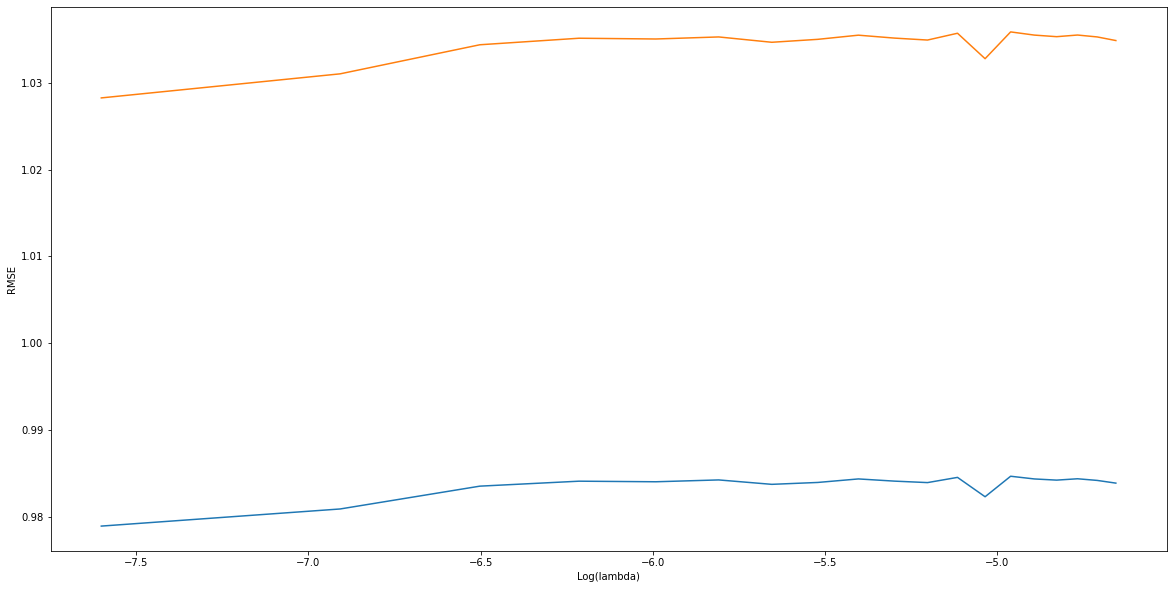

In [82]:
plotReg(lstable.drop(0))